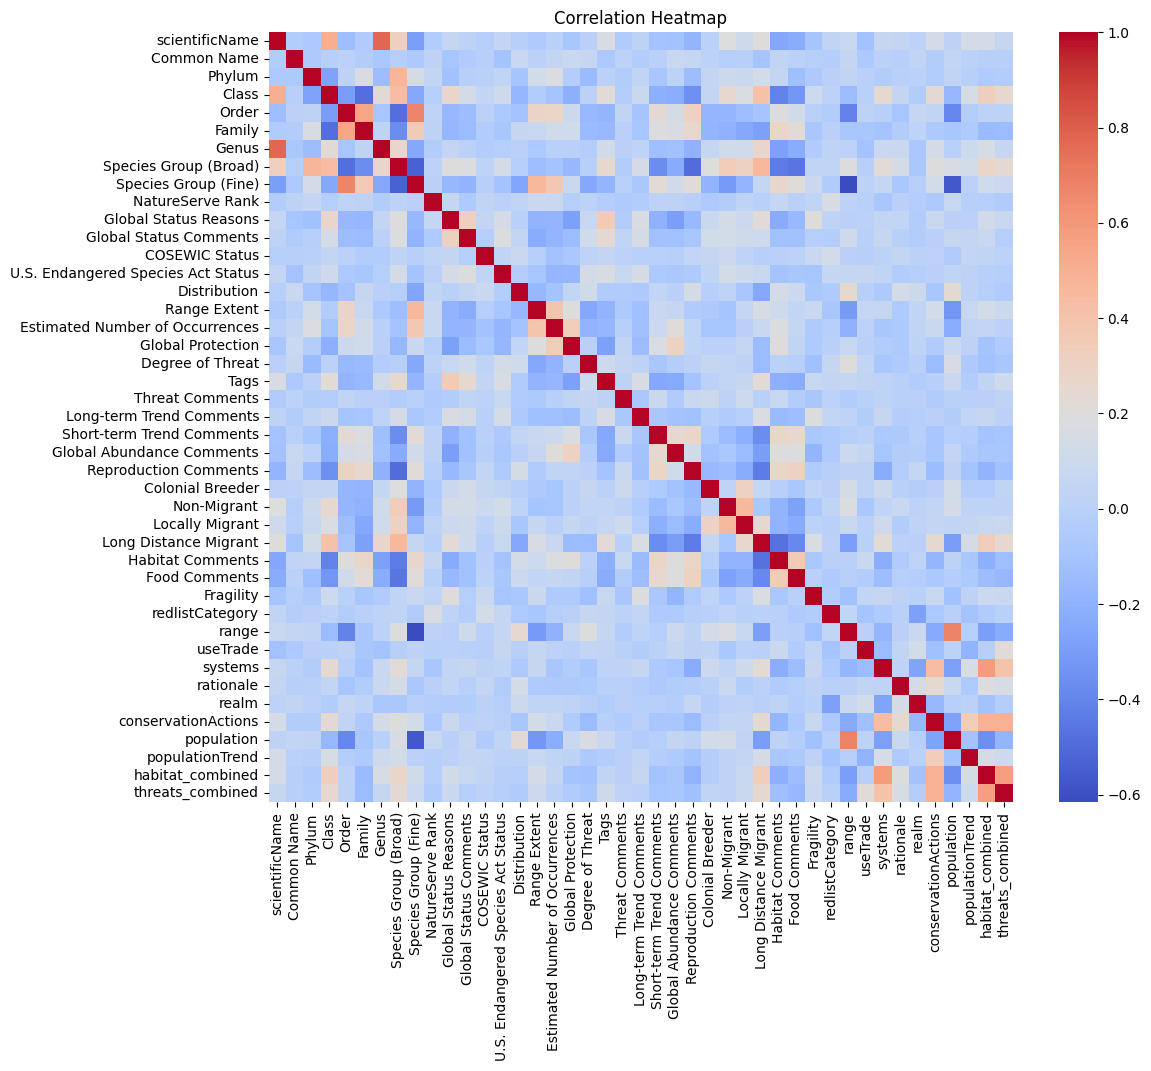

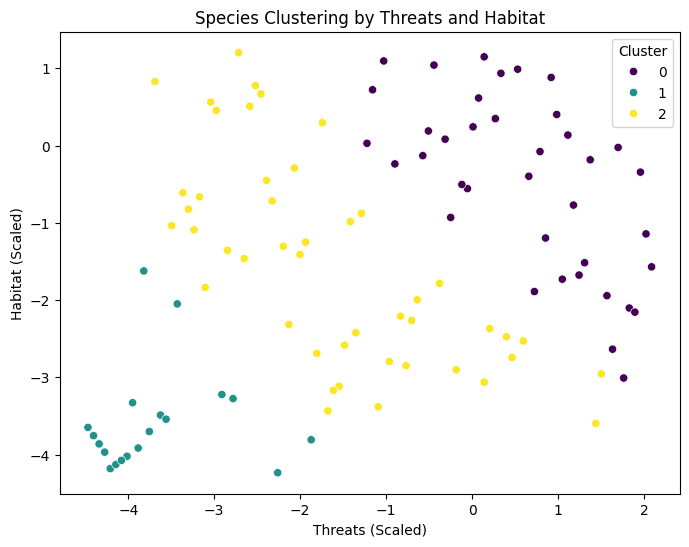

{'Random Forest Accuracy': 0.9454545454545454,
 'Cluster Centers': array([[ 0.29833041,  0.28518001],
        [-3.67225313, -3.56962705],
        [-1.62863996, -1.53237807]])}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Step 1: Load your dataset
file_path = '/content/AI-Dataset-Cleaned.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)


# Step 1: Data Preprocessing
# Remove unnecessary columns
columns_to_drop = ['Unnamed: 43', 'Unnamed: 45', 'Unnamed: 48', 'Kingdom']
data_cleaned = data.drop(columns=columns_to_drop)

# Encode categorical variables for machine learning purposes
encoder = LabelEncoder()
encoded_data = data_cleaned.copy()
categorical_columns = encoded_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

# Step 2: Exploratory Data Analysis (EDA)
# Plot correlation heatmap for numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Predicting Redlist Category
# Separate features and target
X = encoded_data.drop(columns=['redlistCategory'])
y = encoded_data['redlistCategory']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
accuracy = rf_model.score(X_test, y_test)

# Step 4: Clustering Species by Threats
# Use threats_combined and habitat_combined for clustering
clustering_features = encoded_data[['threats_combined', 'habitat_combined']]
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
encoded_data['Cluster'] = kmeans.fit_predict(clustering_scaled)

# Visualize clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=clustering_scaled[:, 0],
    y=clustering_scaled[:, 1],
    hue=encoded_data['Cluster'],
    palette='viridis'
)
plt.title("Species Clustering by Threats and Habitat")
plt.xlabel("Threats (Scaled)")
plt.ylabel("Habitat (Scaled)")
plt.show()

# Display results
results_summary = {
    "Random Forest Accuracy": accuracy,
    "Cluster Centers": kmeans.cluster_centers_,
}

results_summary


In [ ]:
# Step 1: Use the 'Cluster' column as the target variable
X_clf = encoded_data.drop(columns=['Cluster', 'redlistCategory'])
y_clf = encoded_data['Cluster']

# Split into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# Step 2: Train a Random Forest Classifier for cluster prediction
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

# Evaluate the classifier's accuracy
clf_accuracy = rf_classifier.score(X_test_clf, y_test_clf)

# Feature importance analysis
feature_importances = rf_classifier.feature_importances_
important_features = pd.DataFrame({
    'Feature': X_clf.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the classifier accuracy
print(f"Random Forest Classifier Accuracy: {clf_accuracy * 100:.2f}%")

# Display the feature importance
print("Feature Importances:")
print(important_features)

# Optionally, save feature importances to a CSV file
important_features.to_csv('feature_importances.csv', index=False)
print("Feature importances saved to 'feature_importances.csv'")



Random Forest Classifier Accuracy: 96.36%
Feature Importances:
                               Feature  Importance
41                    threats_combined    0.220784
40                    habitat_combined    0.145534
32                               range    0.108179
38                          population    0.061007
33                            useTrade    0.051354
8                 Species Group (Fine)    0.046077
37                 conservationActions    0.042398
34                             systems    0.041504
35                           rationale    0.031075
0                       scientificName    0.019350
1                          Common Name    0.018690
14                        Distribution    0.015289
30                       Food Comments    0.015140
4                                Order    0.014795
3                                Class    0.014124
24               Reproduction Comments    0.012487
21            Long-term Trend Comments    0.010545
5                  

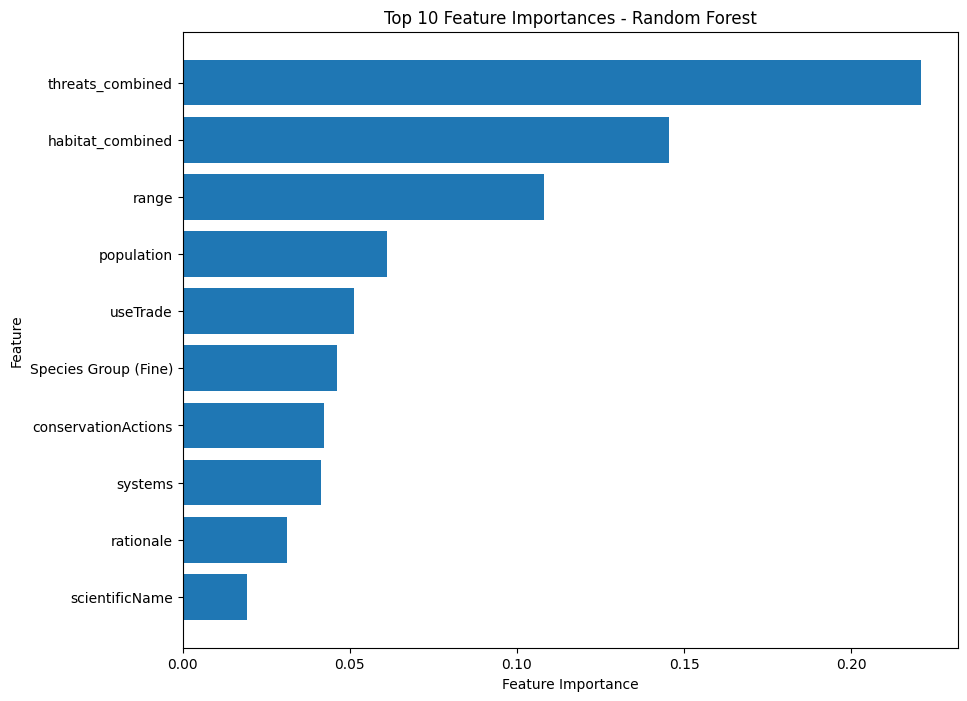

{'Random Forest Accuracy': 0.9636363636363636,
 'Logistic Regression Accuracy': 0.9333333333333333,
 'Gradient Boosting Accuracy': 0.9696969696969697}

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Step 1: Visualize Feature Importances
plt.figure(figsize=(10, 8))
important_features_sorted = important_features.sort_values(by="Importance", ascending=False)
plt.barh(important_features_sorted["Feature"].head(10), important_features_sorted["Importance"].head(10))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Step 2: Logistic Regression Classification
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_clf, y_train_clf)
logistic_predictions = logistic_model.predict(X_test_clf)
logistic_accuracy = accuracy_score(y_test_clf, logistic_predictions)

# Step 3: Gradient Boosting Classification
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_clf, y_train_clf)
gb_predictions = gb_model.predict(X_test_clf)
gb_accuracy = accuracy_score(y_test_clf, gb_predictions)

# Results Comparison
comparison_results = {
    "Random Forest Accuracy": clf_accuracy,
    "Logistic Regression Accuracy": logistic_accuracy,
    "Gradient Boosting Accuracy": gb_accuracy
}

comparison_results


In [ ]:
# Identify potential status-related columns
status_columns = [col for col in data_cleaned.columns if 'status' in col.lower() or 'rank' in col.lower() or 'category' in col.lower()]
status_columns

# Display the identified status columns for review
status_columns

['NatureServe Rank',
 'Global Status Reasons',
 'Global Status Comments',
 'COSEWIC Status',
 'U.S. Endangered Species Act Status',
 'redlistCategory']

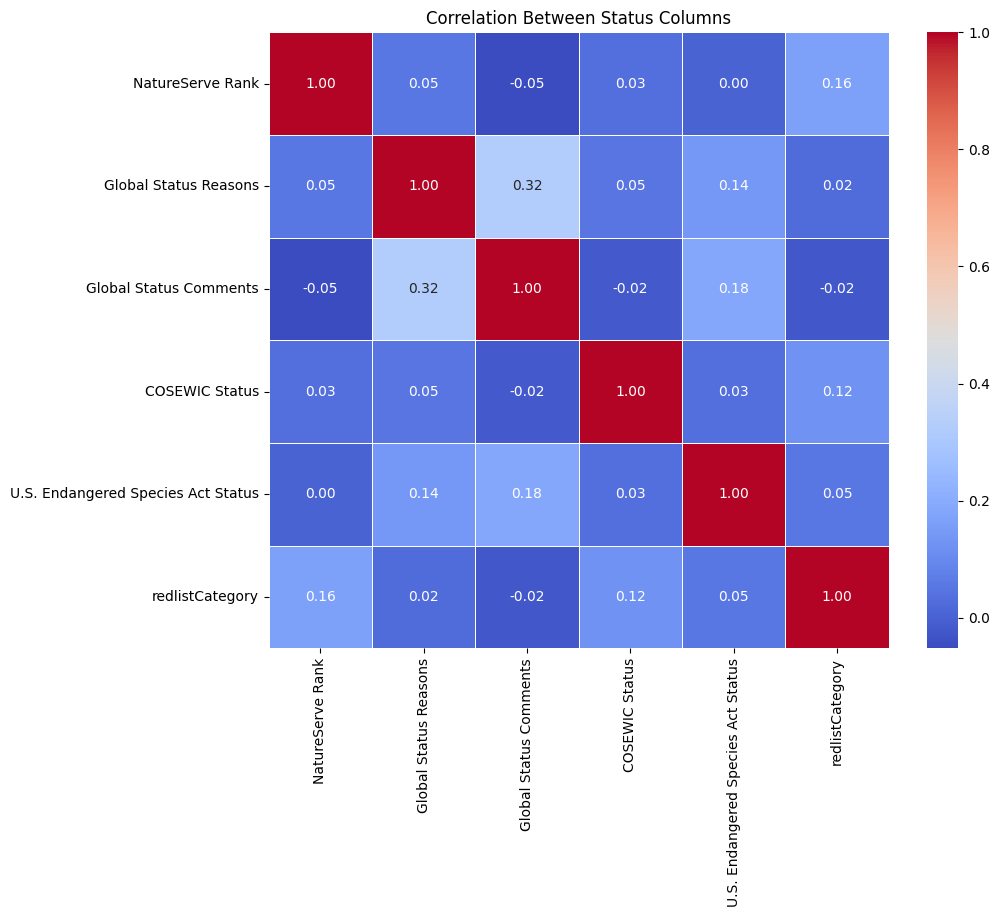

0.9943056943056943

In [ ]:
# Step 1: Analyze Relationships Between Status Columns
status_data = data_cleaned[status_columns]

# Compute correlation between encoded status columns
status_encoded = status_data.copy()
for col in status_encoded.columns:
    if status_encoded[col].dtype == 'object':
        status_encoded[col] = encoder.fit_transform(status_encoded[col])

# Correlation matrix
status_correlation = status_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(status_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Status Columns")
plt.show()

# Step 2: Prepare for Multi-label Classification
# Binarize status columns for multi-label setup
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(status_data.values)

# Use the rest of the dataset for features
X_multilabel = encoded_data.drop(columns=status_columns)

# Split data into training and test sets
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_multilabel, y_multilabel, test_size=0.3, random_state=42
)

# Train a Random Forest Classifier for Multi-label Classification
from sklearn.multioutput import MultiOutputClassifier

multi_rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
multi_rf.fit(X_train_ml, y_train_ml)

# Evaluate the model
y_pred_ml = multi_rf.predict(X_test_ml)
multi_label_accuracy = np.mean(y_pred_ml == y_test_ml)

multi_label_accuracy


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest using MultiOutputClassifier
multi_rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
multi_rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = multi_rf_model.predict(X_test)

# Calculate accuracy for each target column
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Overall average accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"Overall Accuracy Across Targets: {overall_accuracy * 100:.2f}%")


Overall Accuracy Across Targets: 80.30%
